# Simple movie recommender system in Python that uses the correlation

# Importing Libraries


In [1]:
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Load Data

In [2]:
movies_df = pd.read_csv('Dataset/movies.csv', names=['movieId','title'])
rating_df = pd.read_csv('Dataset/ratings.csv', names=['userId','movieId','rating'])

# Prepare the Movies Data Frame 

In [3]:
movies_df = movies_df.iloc[1:]
movies_df.head(3)

,movieId,title
1,1,Toy Story (1995)
2,2,Jumanji (1995)
3,3,Grumpier Old Men (1995)


# Prepare the Ratings Data Frame 

In [4]:
rating_df = rating_df.iloc[1:]
rating_df.head(3)

,userId,movieId,rating
1,1,307,3.5
2,1,481,3.5
3,1,1091,1.5


# Merging the Two Data Frames

In [5]:
df = pd.merge(movies_df, rating_df, on='movieId')
df = df.iloc[1:]
df.head(3)

,movieId,title,userId,rating
1,1,Toy Story (1995),10,5
2,1,Toy Story (1995),14,4.5
3,1,Toy Story (1995),15,4


# Brief description of our dataset

In [6]:
df.describe()

,movieId,title,userId,rating
count,262142,262142,262142,262142
unique,14909,14906,2566,10
top,356,Forrest Gump (1994),2025,4
freq,897,897,3238,67858


In [7]:
df.dtypes

movieId    object
title      object
userId     object
rating     object
dtype: object

In [8]:
df['rating'] = df['rating'].astype(float)
df.dtypes

movieId     object
title       object
userId      object
rating     float64
dtype: object

# Group the dataset by the title column and compute its mean to obtain the average rating for each movie

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(10)

,rating
title,
#Horror (2015),1.000000
$ (Dollars) (1971),3.000000
$5 a Day (2008),1.750000
'71 (2014),3.500000
'Hellboy': The Seeds of Creation (2004),3.500000
'Round Midnight (1986),4.166667
'Salem's Lot (2004),4.000000
'Til There Was You (1997),2.833333
'Twas the Night Before Christmas (1974),3.000000


# Number of ratings for each movie.

In [10]:
ratings['number of ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number of ratings
title,,
#Horror (2015),1.00,1
$ (Dollars) (1971),3.00,1
$5 a Day (2008),1.75,2
'71 (2014),3.50,5
'Hellboy': The Seeds of Creation (2004),3.50,4


# Visualization

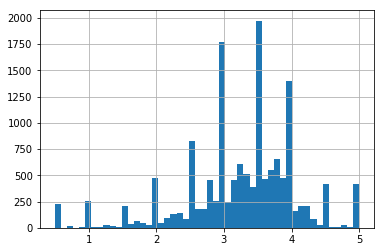

In [11]:
ratings['rating'].hist(bins=50)

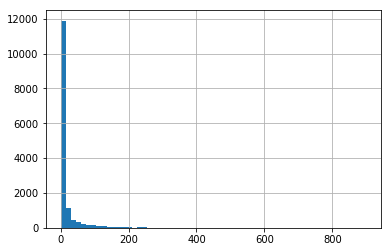

In [12]:
ratings['number of ratings'].hist(bins=60)

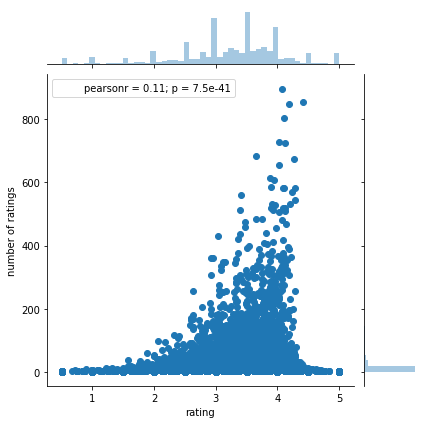

In [13]:
sns.jointplot(x='rating', y='number of ratings', data=ratings)
#From the diagram we can see that their is a positive relationship
#between the average rating of a movie and the number of ratings.
#The graph indicates that the more the ratings a movie gets the
#higher the average rating it gets. This is important to note
#especially when choosing the threshold for the number of ratings per movie.

In [17]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,#Horror (2015),$ (Dollars) (1971),$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",...,loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014),Оно (1990),Сердца трех (1992),チェブラーシカ (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('number of ratings', ascending=False).head(10)

,rating,number of ratings
title,,
Forrest Gump (1994),4.080825,897
"Shawshank Redemption, The (1994)",4.422222,855
Pulp Fiction (1994),4.192444,847
"Silence of the Lambs, The (1991)",4.111940,804
Star Wars: Episode IV - A New Hope (1977),4.033012,727
"Matrix, The (1999)",4.120332,723
Jurassic Park (1993),3.655702,684
Schindler's List (1993),4.271513,674
Braveheart (1995),4.026718,655


In [21]:
AFO_user_rating = movie_matrix['Forrest Gump (1994)']
contact_user_rating = movie_matrix['Pulp Fiction (1994)']

In [23]:
AFO_user_rating.head()

userId
1       NaN
10      NaN
100     4.5
1000    4.0
1001    NaN
Name: Forrest Gump (1994), dtype: float64

In [24]:
contact_user_rating.head()

userId
1       NaN
10      NaN
100     4.5
1000    3.0
1001    NaN
Name: Pulp Fiction (1994), dtype: float64

In [26]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()

title
#Horror (2015)                                  NaN
$ (Dollars) (1971)                              NaN
$5 a Day (2008)                                 NaN
'71 (2014)                                 0.409891
'Hellboy': The Seeds of Creation (2004)         NaN
dtype: float64

In [27]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
#Horror (2015)                                  NaN
$ (Dollars) (1971)                              NaN
$5 a Day (2008)                                 NaN
'71 (2014)                                 0.904534
'Hellboy': The Seeds of Creation (2004)   -1.000000
dtype: float64

In [28]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
'71 (2014),0.409891
'Round Midnight (1986),0.500000
'Til There Was You (1997),0.866025
"'burbs, The (1989)",-0.107865
(500) Days of Summer (2009),0.401923


In [29]:
corr_AFO = corr_AFO.join(ratings['number of ratings'])
corr_contact = corr_contact.join(ratings['number of ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number of ratings
title,,
'71 (2014),0.904534,5
'Hellboy': The Seeds of Creation (2004),-1.000000,4
'Til There Was You (1997),0.485913,6
"'burbs, The (1989)",0.044442,42
'night Mother (1986),-1.000000,4


In [30]:
corr_AFO[corr_AFO['number of ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number of ratings
title,,
Forrest Gump (1994),1.000000,897
"Karate Kid, The (1984)",0.590144,113
Mr. Holland's Opus (1995),0.586107,222
Bruce Almighty (2003),0.524944,147
Saving Private Ryan (1998),0.479594,506
What Women Want (2000),0.477390,112
Bad Boys (1995),0.474744,152
Copycat (1995),0.472188,108
Slumdog Millionaire (2008),0.465112,188


In [31]:
corr_contact[corr_contact['number of ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number of ratings
title,,
Pulp Fiction (1994),1.000000,847
Reservoir Dogs (1992),0.489739,334
Muriel's Wedding (1994),0.466828,136
Interstellar (2014),0.457281,195
Some Like It Hot (1959),0.443742,118
There Will Be Blood (2007),0.442128,109
Harold and Maude (1971),0.438889,101
Singin' in the Rain (1952),0.438038,118
"Grand Budapest Hotel, The (2014)",0.433149,124
